Data loading and cleaning

In [1]:
import pandas as pd

# Load the dataframe.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Di Bootcamp files/Palmer Penguins Dataset.csv')

# Print some info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [3]:
df.head()
df.shape
df.columns
df.dtypes
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [5]:
# Rename columns for easier handling
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Drop rows with missing values (simple approach, consider imputation for real projects)
df.dropna(inplace=True)

# Convert 'sex' to categorical with numerical representation (optional, depends on downstream task)
df['sex'] = df['sex'].astype('category').cat.codes

# Convert 'species' to categorical (important for classification tasks)
df['species'] = df['species'].astype('category')

# Display info and head of the cleaned dataframe
df.info()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    object  
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    int8    
 7   year               333 non-null    int64   
dtypes: category(1), float64(4), int64(1), int8(1), object(1)
memory usage: 19.0+ KB


,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


EDA

In [6]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,0.504505,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.500732,0.812944
min,32.100000,13.100000,172.000000,2700.000000,0.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,1.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,1.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000,2009.000000


Unique values in species: ['Adelie', 'Gentoo', 'Chinstrap']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']
Unique values in island: ['Torgersen' 'Biscoe' 'Dream']

Range of numerical columns:
bill_length_mm: Min = 32.1, Max = 59.6
bill_depth_mm: Min = 13.1, Max = 21.5
flipper_length_mm: Min = 172.0, Max = 231.0
body_mass_g: Min = 2700.0, Max = 6300.0
sex: Min = 0, Max = 1

Distribution of numerical columns:


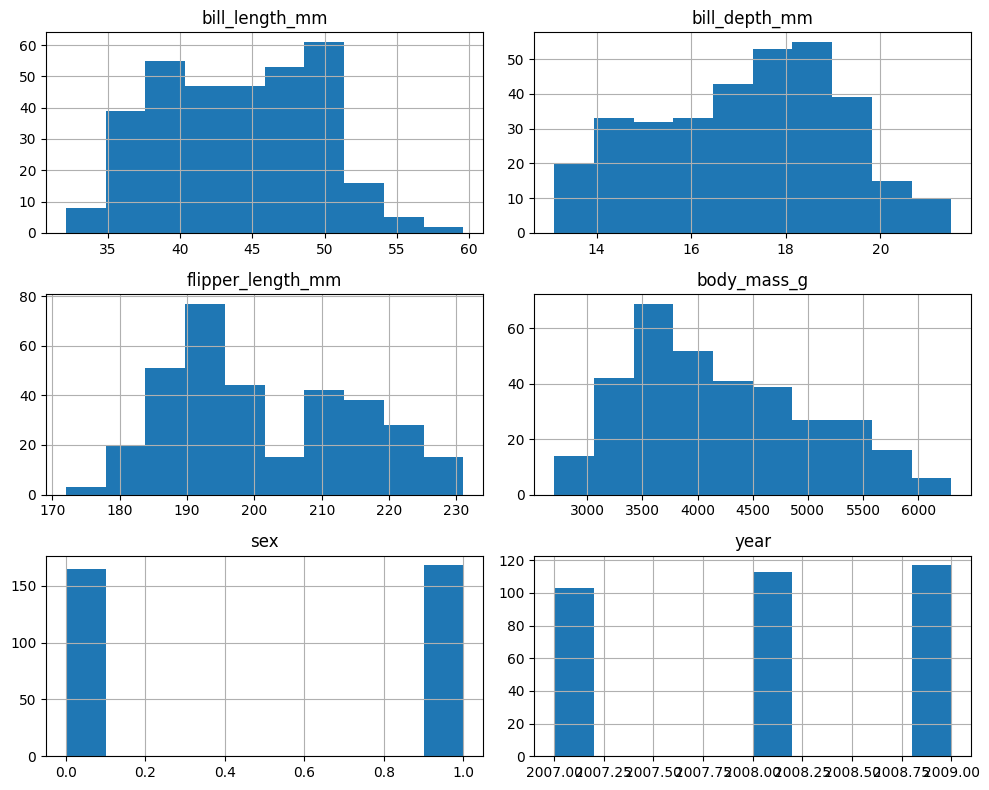


Distribution of categorical columns:


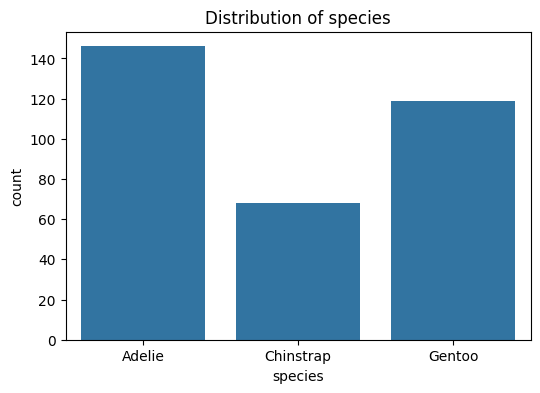

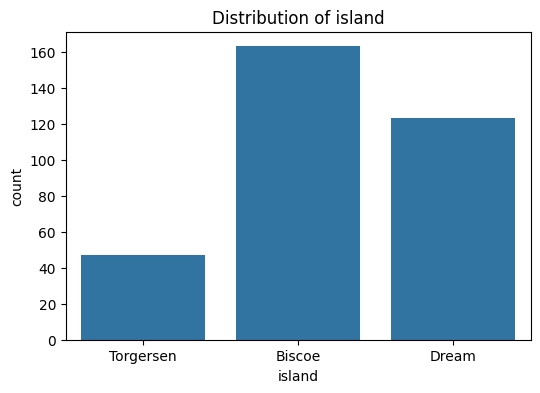

In [7]:
# Display unique values for categorical columns
for col in ['species', 'island']:
  print(f"Unique values in {col}: {df[col].unique()}")

# Display the range for numerical columns
print("\nRange of numerical columns:")
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']:
  print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

# Display the distribution for numerical columns using histograms
import matplotlib.pyplot as plt
import seaborn as sns

print("\nDistribution of numerical columns:")
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Display distribution for categorical columns using countplots
print("\nDistribution of categorical columns:")
for col in ['species', 'island']:
  plt.figure(figsize=(6, 4))
  sns.countplot(data=df, x=col)
  plt.title(f'Distribution of {col}')
  plt.show()

Visualization Tasks

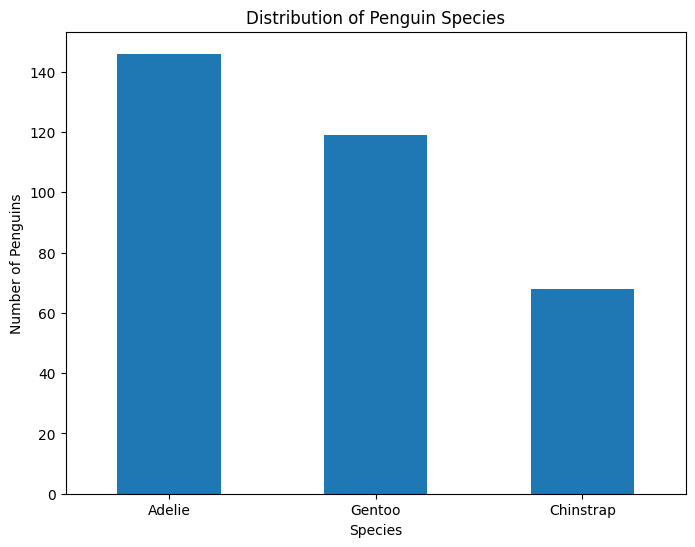

In [8]:
import matplotlib.pyplot as plt
# Count the number of penguins for each species
species_counts = df['species'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar')
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Number of Penguins')
plt.xticks(rotation=0) # Keep labels horizontal
plt.show()

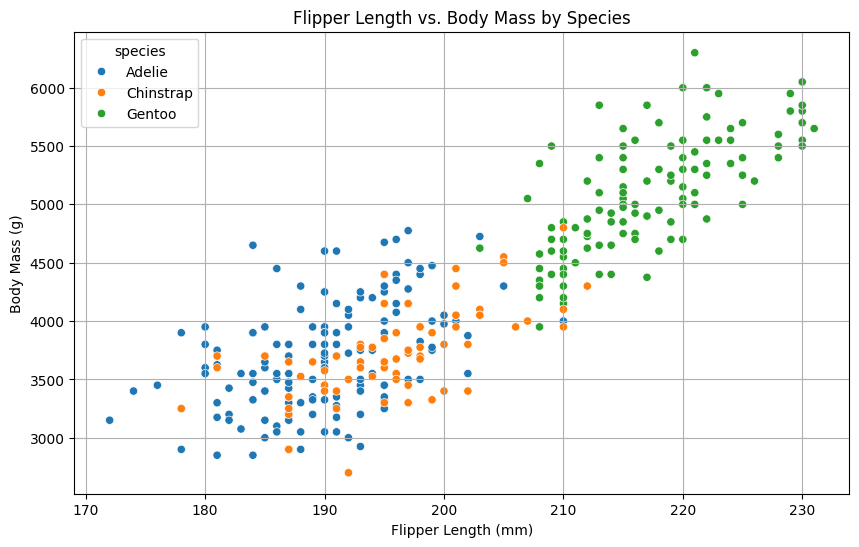

In [9]:
import matplotlib.pyplot as plt
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Flipper Length vs. Body Mass by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid(True)
plt.show()

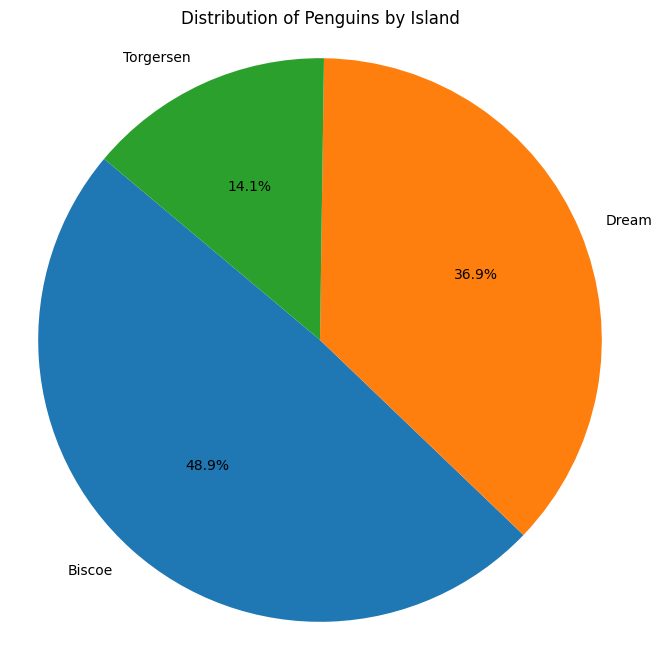

In [10]:
import matplotlib.pyplot as plt
# Count the number of penguins on each island
island_counts = df['island'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Penguins by Island')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

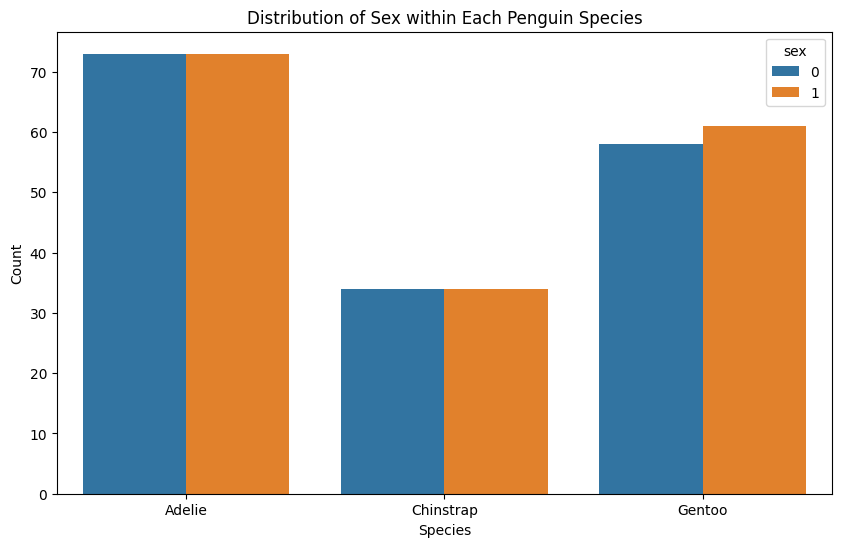

In [11]:
import matplotlib.pyplot as plt
# Create grouped bar charts showing the distribution of sex within each penguin species.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='species', hue='sex')
plt.title('Distribution of Sex within Each Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

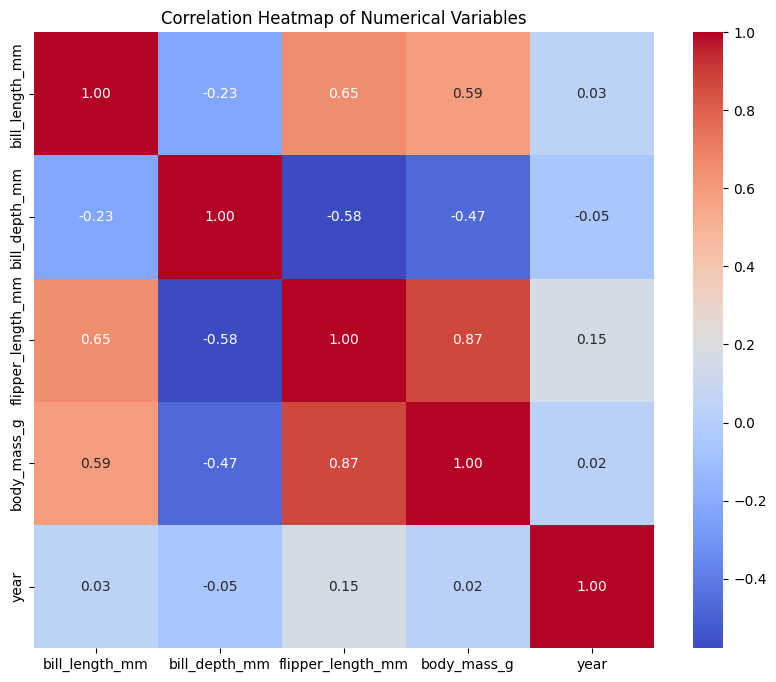

In [12]:
import matplotlib.pyplot as plt
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

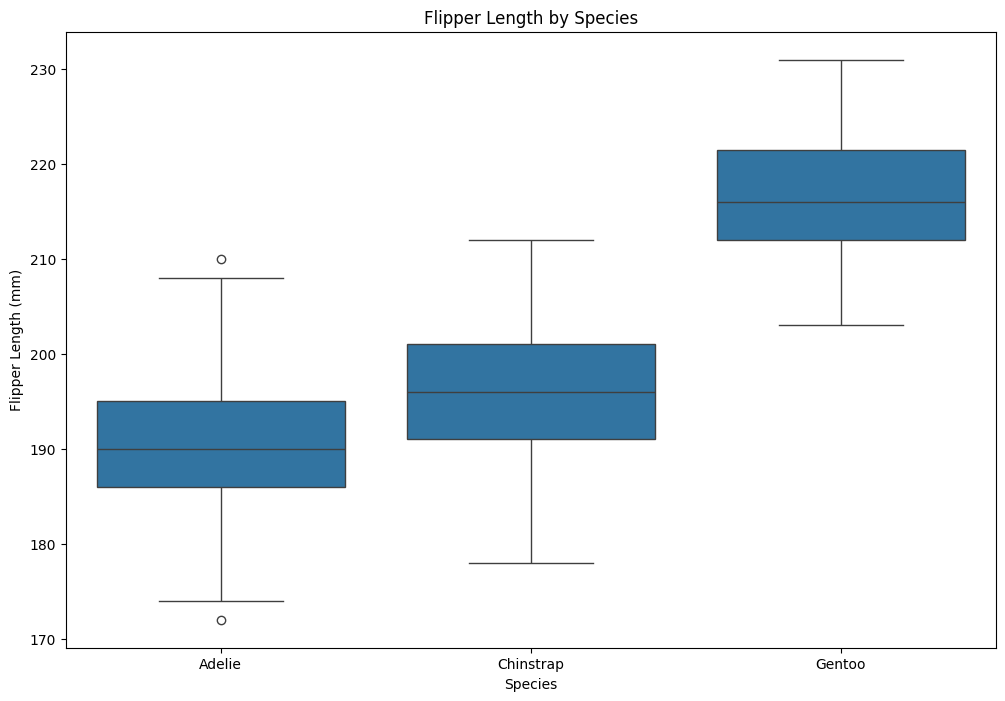

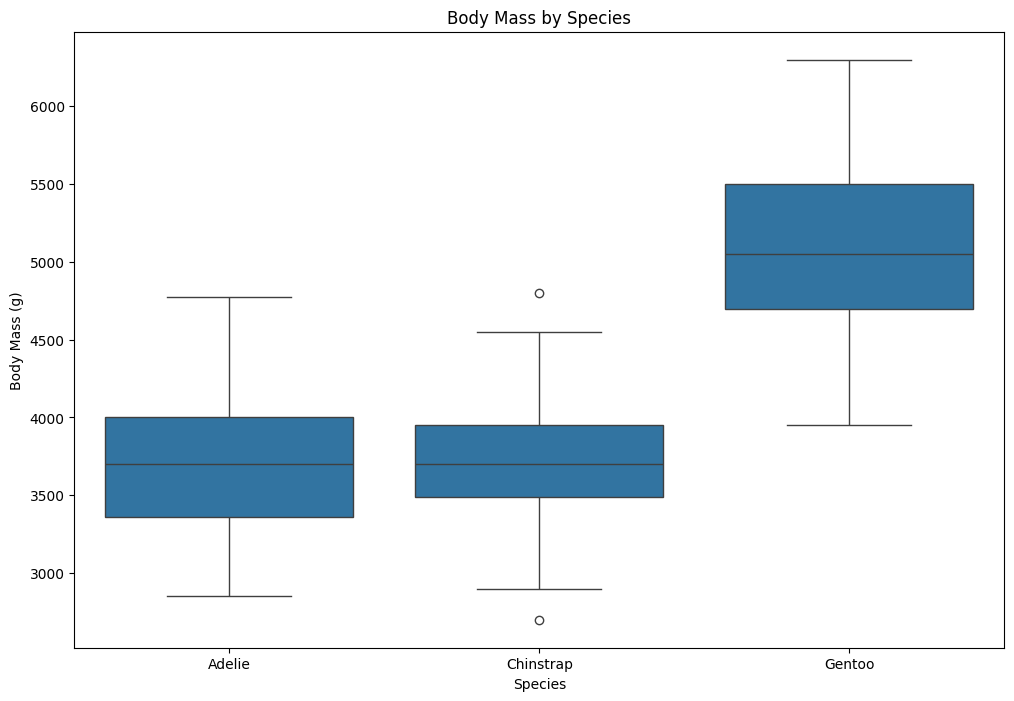

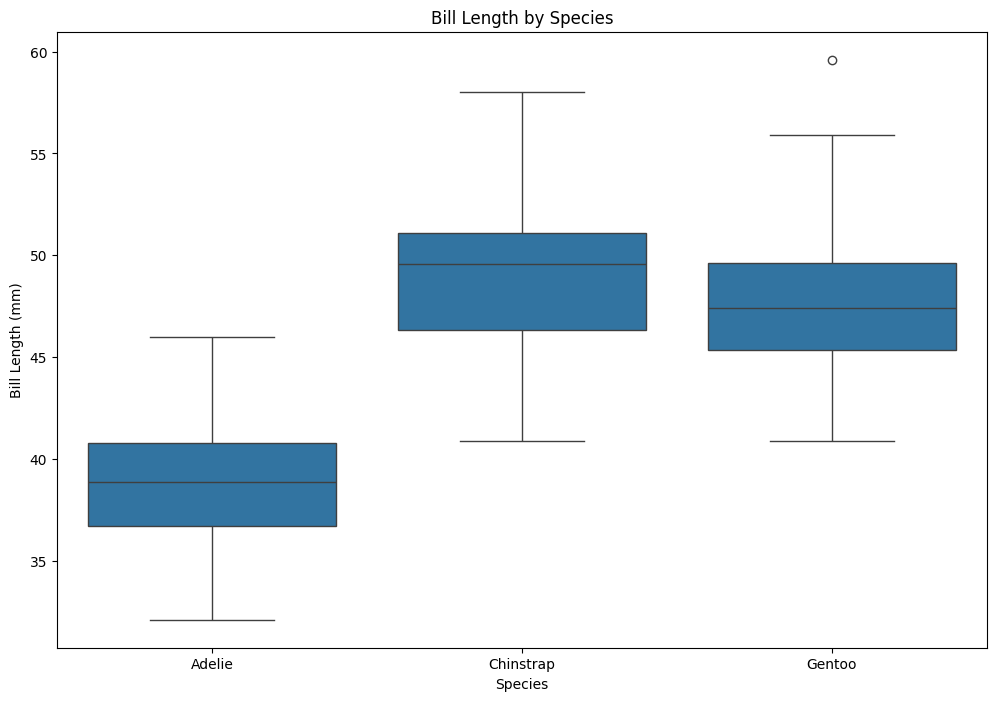

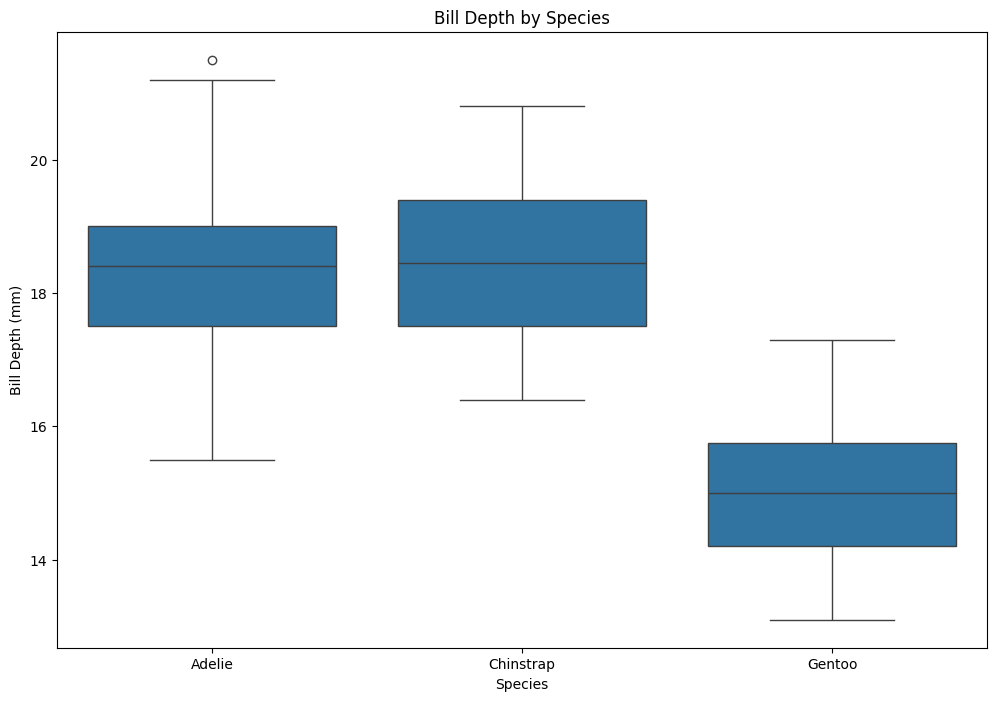

In [13]:
import matplotlib.pyplot as plt
# Boxplots for numerical measurements segmented by species
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='flipper_length_mm')
plt.title('Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.title('Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='bill_length_mm')
plt.title('Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='bill_depth_mm')
plt.title('Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()

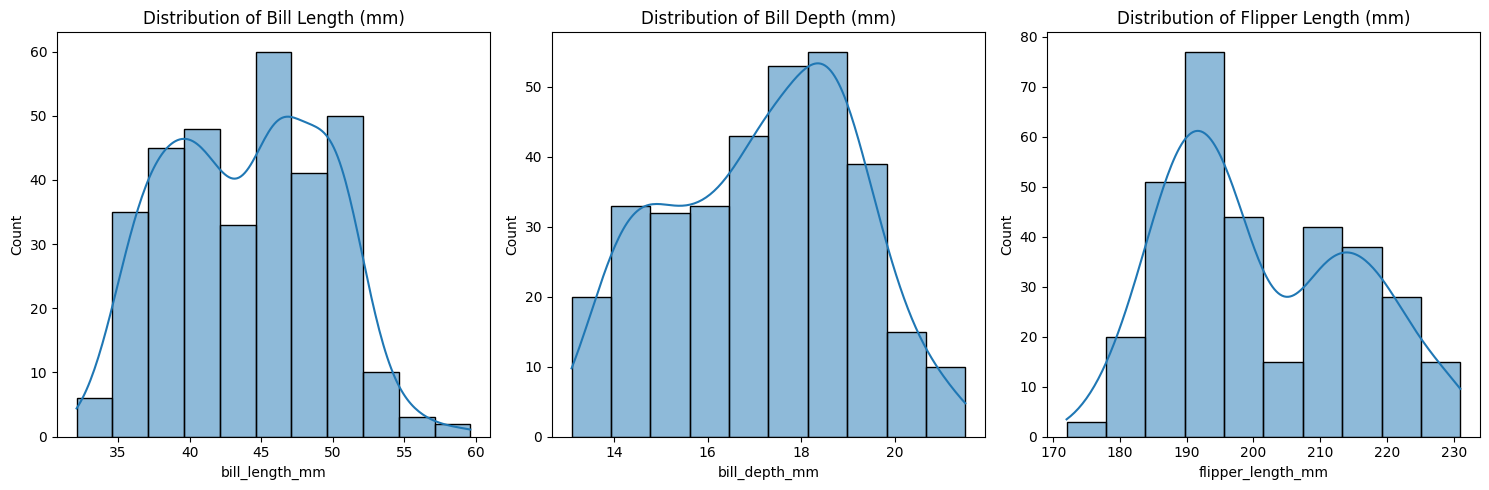

In [14]:
import matplotlib.pyplot as plt
# Histograms for key measurements
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='bill_length_mm', kde=True)
plt.title('Distribution of Bill Length (mm)')

plt.subplot(1, 3, 2)
sns.histplot(data=df, x='bill_depth_mm', kde=True)
plt.title('Distribution of Bill Depth (mm)')

plt.subplot(1, 3, 3)
sns.histplot(data=df, x='flipper_length_mm', kde=True)
plt.title('Distribution of Flipper Length (mm)')

plt.tight_layout()
plt.show()

Visual insights

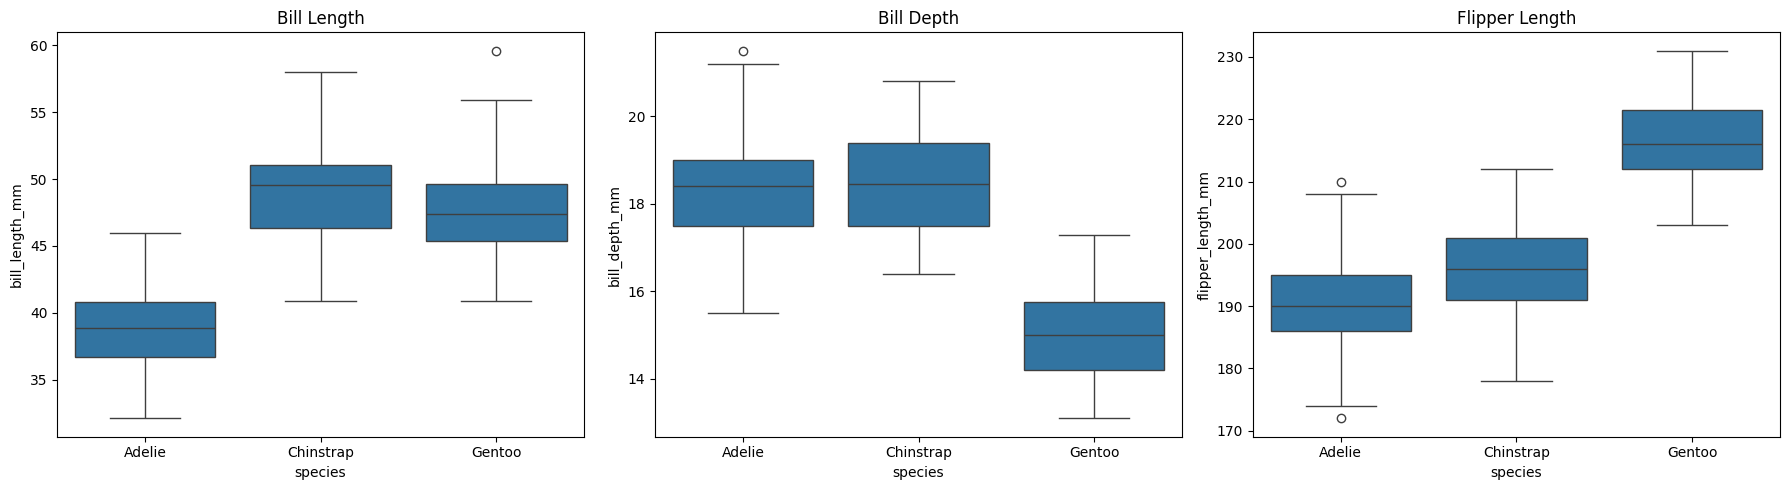

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='species', y='bill_length_mm', ax=axes[0])
axes[0].set_title("Bill Length")

sns.boxplot(data=df, x='species', y='bill_depth_mm', ax=axes[1])
axes[1].set_title("Bill Depth")

sns.boxplot(data=df, x='species', y='flipper_length_mm', ax=axes[2])
axes[2].set_title("Flipper Length")

plt.tight_layout()
plt.show()


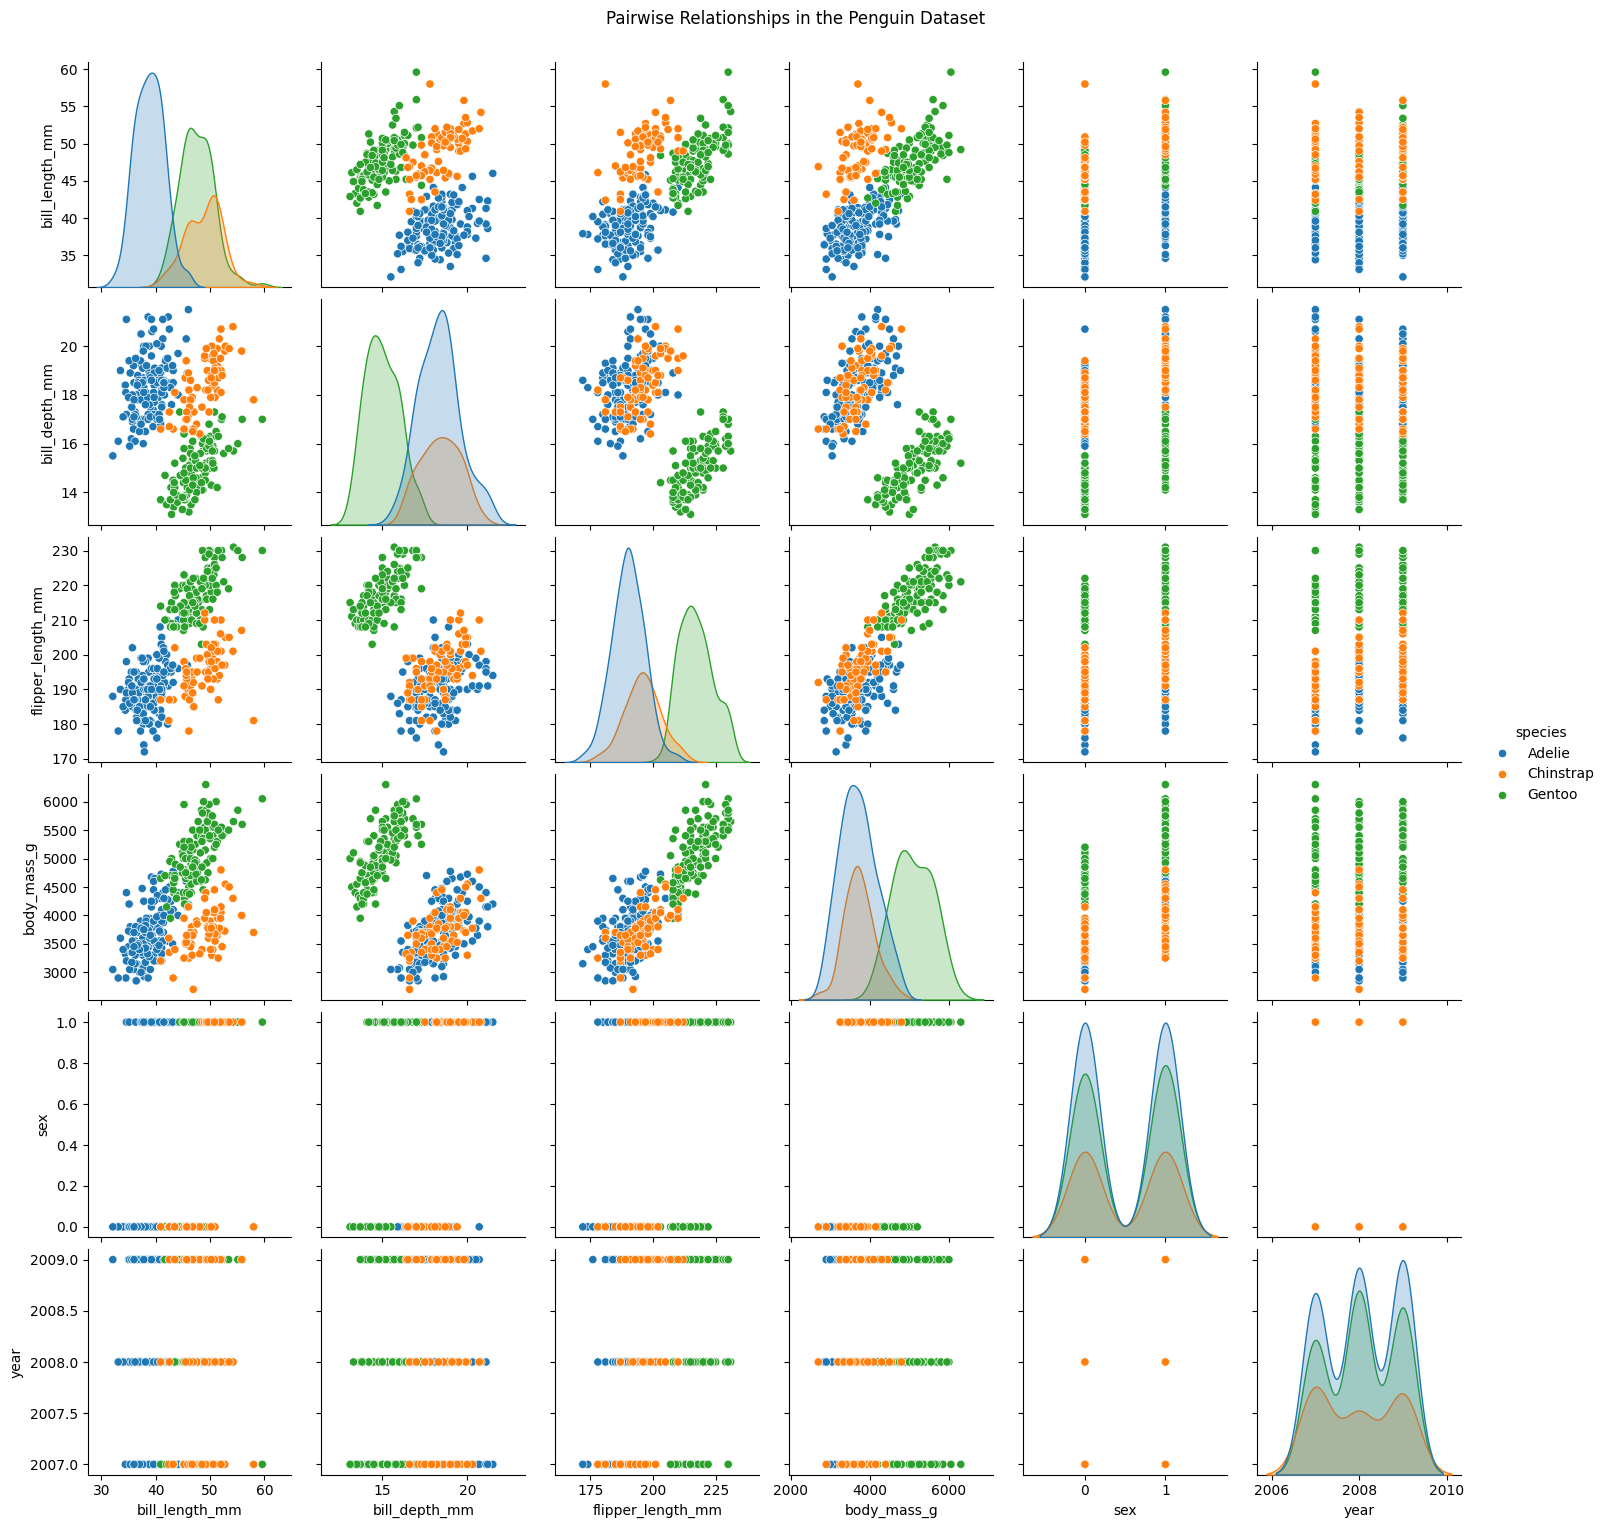

In [16]:
sns.pairplot(df, hue='species')
plt.suptitle("Pairwise Relationships in the Penguin Dataset", y=1.02)
plt.show()


Conclusion

In [18]:
# The visualizations reveal several key insights and patterns about the Palmer Penguins dataset:

# 1.  **Species Distribution:** The dataset contains three penguin species: Adelie, Gentoo, and Chinstrap. Adelie is the most numerous species, followed by Gentoo and then Chinstrap.
# 2.  **Island Distribution:** The penguins are found on three islands: Torgersen, Biscoe, and Dream. Biscoe has the largest population of penguins, followed by Dream, and then Torgersen. There are clear relationships between species and island distribution, with some species being predominantly found on certain islands.
# 3.  **Sex Distribution:** Within each species, the distribution of males and females appears to be relatively balanced.
# 4.  **Flipper Length and Body Mass Relationship:** There is a strong positive correlation between flipper length and body mass. Gentoo penguins are generally larger, with longer flippers and greater body mass, than Adelie and Chinstrap penguins.
# 5.  **Morphological Differences between Species:** The boxplots and pairwise plots clearly show that the three species have distinct distributions for bill length, bill depth, and flipper length. These measurements are strong discriminators for the species:
#     *   Gentoo penguins tend to have the longest flippers and largest body mass.
#     *   Adelie penguins have intermediate flipper length and body mass, and generally shorter and deeper bills compared to Chinstrap.
#     *   Chinstrap penguins have the longest and narrowest bills among the three species.
# 6.  **Correlation between Numerical Features:** The heatmap shows positive correlations between several numerical features, particularly between flipper length, body mass, bill length, and bill depth. This suggests that larger penguins tend to have larger body parts, which is expected.
# 7.  **Unimodal Distributions:** Histograms for bill length, bill depth, and flipper length generally show unimodal distributions when considering the entire dataset, but when segmented by species (as seen implicitly in the boxplots and pairplots), the distributions become clearer for each group.

# Overall, the visualizations highlight significant differences in physical characteristics and island distribution among the three penguin species, making these features valuable for species classification.